In [1]:
# Setup
import sys
import os
import higlass as hg

hg.__version__

'1.0.0'

In [86]:
## remote data
tileset1 = hg.remote(
    uid="CQMd6V_cRw6iCI_-Unl3PQ",
    server="https://higlass.io/api/v1/",
    name="Rao et al. (2014) GM12878 MboI (allreps) 1kb",
)

## local data
tileset2 = hg.cooler("../../../2023_03_01_v0_dataGathering/v0_poreC_explore/100db.mcool") #::/resolutions/1000


In [96]:
t = tileset2.track('heatmap',server_port = 8890)

hg.view(t)

View(layout=Layout(x=0, y=0, w=12, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid='a4c0711a503f8af8c2fb9e1088fc5b98', server='http://localhost:37013/tilesets/api/v1/', type='heatmap', uid='769e34b2-3382-4bcd-be4f-8ede809bc138', width=None, height=None, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='4c1cd395-fcae-4bcf-af55-86901b18cc54', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1, None))

In [24]:
# Create a `hg.HeatmapTrack` for each tileset
track1 = tileset1.track("heatmap",height = 300)
track2 = tileset2.track("heatmap",height = 300)

# Create two independent `hg.View`s, one for each heatmap
view1 = hg.view(track1, width=6)
view2 = hg.view(track2, width=6)

# Lock zoom & location for each `View`
view_lock = hg.lock(view1, view2)

# Concatenate views horizontally and apply synchronization lock
(view1 | view2).locks(view_lock)

Viewconf(editable=True, viewEditable=True, tracksEditable=True, zoomFixed=None, compactLayout=None, exportViewUrl=None, trackSourceServers=None, views=[View(layout=Layout(x=0, y=0, w=6, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid='CQMd6V_cRw6iCI_-Unl3PQ', server='https://higlass.io/api/v1/', type='heatmap', uid='88ec9414-97eb-4ed2-9154-d3f3e4920a2f', width=None, height=300, options={'name': 'Rao et al. (2014) GM12878 MboI (allreps) 1kb'}, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='778016de-8ff0-47f0-a87c-dd6bc0de208e', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=6, y=0, w=6, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid='ce00f2a371dee5f638f97a81198f98af', server='http://localhost:37013/tilesets/api/v1/', type='heatmap', uid='18bbe068-1a93-4034-9806-19c291fb4a0b', width=None, height=300, options=None, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='5e53923f-609b-4994-bc33-2549d7cb97e7', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=None, initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None))], zoomLocks=ZoomLocks(locksByViewUid={'778016de-8ff0-47f0-a87c-dd6bc0de208e': '2e2db0b6-909d-4aa2-b99d-f88709a72bd8', '5e53923f-609b-4994-bc33-2549d7cb97e7': '2e2db0b6-909d-4aa2-b99d-f88709a72bd8'}, locksDict={'2e2db0b6-909d-4aa2-b99d-f88709a72bd8': Lock(uid='2e2db0b6-909d-4aa2-b99d-f88709a72bd8', 778016de-8ff0-47f0-a87c-dd6bc0de208e=(1.0, 1.0, 1.0), 5e53923f-609b-4994-bc33-2549d7cb97e7=(1.0, 1.0, 1.0))}), locationLocks=LocationLocks(locksByViewUid={'778016de-8ff0-47f0-a87c-dd6bc0de208e': '2e2db0b6-909d-4aa2-b99d-f88709a72bd8', '5e53923f-609b-4994-bc33-2549d7cb97e7': '2e2db0b6-909d-4aa2-b99d-f88709a72bd8'}, locksDict={'2e2db0b6-909d-4aa2-b99d-f88709a72bd8': Lock(uid='2e2db0b6-909d-4aa2-b99d-f88709a72bd8', 778016de-8ff0-47f0-a87c-dd6bc0de208e=(1.0, 1.0, 1.0), 5e53923f-609b-4994-bc33-2549d7cb97e7=(1.0, 1.0, 1.0))}), valueScaleLocks=ValueScaleLocks(locksByViewUid={}, locksDict={}), chromInfoPath=None)

In [16]:
tset1 = hg.remote(
    uid="CQMd6V_cRw6iCI_-Unl3PQ",
    name="Rao et al. (2014) GM12878 MboI (allreps) 1kb",
)

tset2 = hg.remote(
    uid="QvdMEvccQuOxKTEjrVL3wA",
    name="Rao et al. (2014) K562 MboI (allreps) 1kb",
)

t1 = tset1.track("heatmap", height=300)
t2 = tset2.track("heatmap", height=300)

t3 = hg.divide(t1, t2).opts(
    colorRange=["blue", "white", "red"],
    valueScaleMin=0.1,
    valueScaleMax=10,
)

domain = (7e7, 8e7)
v1 = hg.view(t1, width=4).domain(x=domain)
v2 = hg.view(t2, width=4).domain(x=domain)
v3 = hg.view(t3, width=4).domain(x=domain)

(v1 | v3 | v2).locks(hg.lock(v1, v2, v3))

Viewconf(editable=True, viewEditable=True, tracksEditable=True, zoomFixed=None, compactLayout=None, exportViewUrl=None, trackSourceServers=None, views=[View(layout=Layout(x=0, y=0, w=4, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid='CQMd6V_cRw6iCI_-Unl3PQ', server='https://higlass.io/api/v1', type='heatmap', uid='f6463961-85ff-430c-b00c-aa2f5be4585d', width=None, height=300, options={'name': 'Rao et al. (2014) GM12878 MboI (allreps) 1kb'}, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='2f2248fa-90cd-4344-9702-f79fc4a6a801', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=(70000000.0, 80000000.0), initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=4, y=0, w=4, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid=None, server=None, type='heatmap', uid='ea25b9b6-12ea-4662-ba84-3f87e8f3de70', width=None, height=300, options={'name': 'Rao et al. (2014) GM12878 MboI (allreps) 1kb', 'colorRange': ['blue', 'white', 'red'], 'valueScaleMin': 0.1, 'valueScaleMax': 10}, data=Data(type='divided', url=None, server=None, filetype=None, children=[{'tilesetUid': 'CQMd6V_cRw6iCI_-Unl3PQ', 'server': 'https://higlass.io/api/v1'}, {'tilesetUid': 'QvdMEvccQuOxKTEjrVL3wA', 'server': 'https://higlass.io/api/v1'}], tilesetInfo=None, tiles=None), position=None, transforms=None)], whole=None, gallery=None), uid='a3587d72-5354-4ebf-aee2-f39b42caf5e6', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=(70000000.0, 80000000.0), initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None)), View(layout=Layout(x=8, y=0, w=4, h=6, moved=None, static=None), tracks=Tracks[TrackT](left=None, right=None, top=None, bottom=None, center=[HeatmapTrack(tilesetUid='QvdMEvccQuOxKTEjrVL3wA', server='https://higlass.io/api/v1', type='heatmap', uid='abf2c9d6-e431-4ff1-b56f-fd02d5d89d3d', width=None, height=300, options={'name': 'Rao et al. (2014) K562 MboI (allreps) 1kb'}, data=None, position=None, transforms=None)], whole=None, gallery=None), uid='d87528c8-c428-4a34-8627-e0eb49d11a6c', autocompleteSource=None, chromInfoPath=None, genomePositionSearchBox=None, genomePositionSearchBoxVisible=None, initialXDomain=(70000000.0, 80000000.0), initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1.0, None))], zoomLocks=ZoomLocks(locksByViewUid={'2f2248fa-90cd-4344-9702-f79fc4a6a801': '7336c5d0-1819-4e67-87ed-ff28e5ae436e', 'd87528c8-c428-4a34-8627-e0eb49d11a6c': '7336c5d0-1819-4e67-87ed-ff28e5ae436e', 'a3587d72-5354-4ebf-aee2-f39b42caf5e6': '7336c5d0-1819-4e67-87ed-ff28e5ae436e'}, locksDict={'7336c5d0-1819-4e67-87ed-ff28e5ae436e': Lock(uid='7336c5d0-1819-4e67-87ed-ff28e5ae436e', 2f2248fa-90cd-4344-9702-f79fc4a6a801=(1.0, 1.0, 1.0), d87528c8-c428-4a34-8627-e0eb49d11a6c=(1.0, 1.0, 1.0), a3587d72-5354-4ebf-aee2-f39b42caf5e6=(1.0, 1.0, 1.0))}), locationLocks=LocationLocks(locksByViewUid={'2f2248fa-90cd-4344-9702-f79fc4a6a801': '7336c5d0-1819-4e67-87ed-ff28e5ae436e', 'd87528c8-c428-4a34-8627-e0eb49d11a6c': '7336c5d0-1819-4e67-87ed-ff28e5ae436e', 'a3587d72-5354-4ebf-aee2-f39b42caf5e6': '7336c5d0-1819-4e67-87ed-ff28e5ae436e'}, locksDict={'7336c5d0-1819-4e67-87ed-ff28e5ae436e': Lock(uid='7336c5d0-1819-4e67-87ed-ff28e5ae436e', 2f2248fa-90cd-4344-9702-f79fc4a6a801=(1.0, 1.0, 1.0), d87528c8-c428-4a34-8627-e0eb49d11a6c=(1.0, 1.0, 1.0), a3587d72-5354-4ebf-aee2-f39b42caf5e6=(1.0, 1.0, 1.0))}), valueScaleLocks=ValueScaleLocks(locksByViewUid={}, locksDict={}), chromInfoPath=None)

In [48]:
import cooler
import numpy as np
c1 = cooler.Cooler("../../../2023_03_01_v0_dataGathering/v0_poreC_explore/100db.mcool::/resolutions/1000")

In [26]:
dir(cooler)

['Cooler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__format_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_logging',
 '_version',
 'annotate',
 'api',
 'balance',
 'balance_cooler',
 'binnify',
 'coarsen_cooler',
 'core',
 'create',
 'create_cooler',
 'create_scool',
 'fetch_chromsizes',
 'fileops',
 'get_verbosity_level',
 'ice',
 'merge_coolers',
 'parallel',
 'read_chromsizes',
 'reduce',
 'rename_chroms',
 'set_verbosity_level',
 'tools',
 'util',
 'zoomify_cooler']

In [78]:
#cooler.balance_cooler(c1)
#c1.bins()['weight'] = biases[0].tolist()
#mat = c1.matrix(balance=biases[0].tolist, sparse=True)[1000:1050, 1000:1050]
#arr = mat.toarray()

c1.bins()['weight'] = biases

TypeError: 'RangeSelector1D' object does not support item assignment

/tmp/ipykernel_5123/4292348178.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(arr), cmap='YlOrRd')


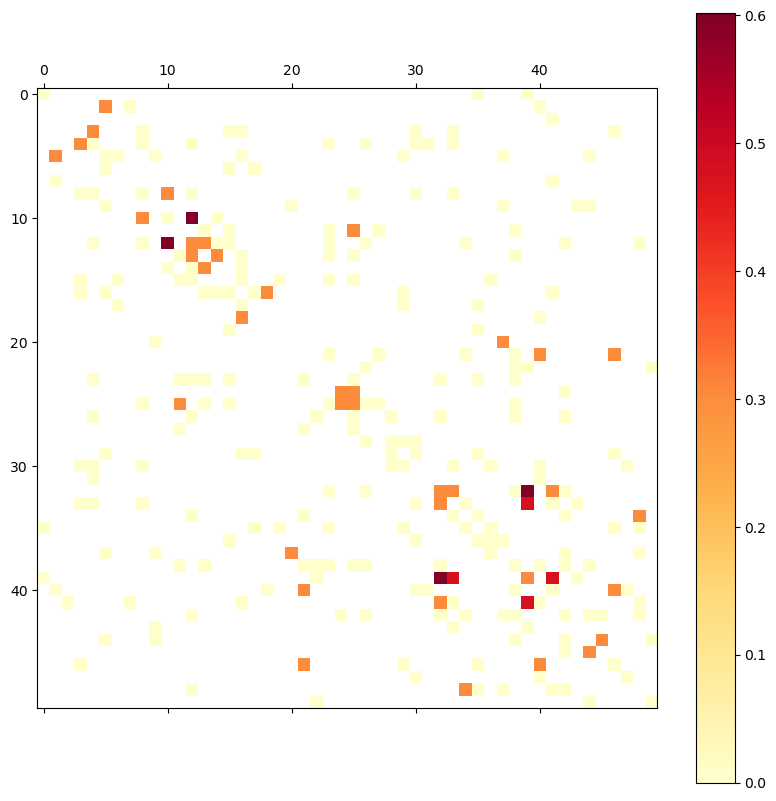

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)